In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

In [2]:
df_bank_bruto = pd.read_csv('bank.csv', sep=';')
df_bank_bruto

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df_clientes = df_bank_bruto.copy()
df_clientes = df_clientes[df_clientes['y']=='yes']
df_clientes.reset_index(drop=True, inplace=True)
df_clientes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,579,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,461,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,208,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
4636,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
4637,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
4638,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Transformando dados categoricos em númericos

In [4]:
df_bruto_encoded = df_bank_bruto.copy()
print(f'As linhas e colunas do df bruto são: {df_bruto_encoded.shape}')

df_encoded= df_clientes.copy()
print(f'As linhas e colunas do df apenas clientes são: {df_encoded.shape}')

As linhas e colunas do df bruto são: (41188, 21)
As linhas e colunas do df apenas clientes são: (4640, 21)


In [5]:
df_bruto_encoded.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df_encoded.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


Base bruta

In [7]:
# Vou transformar todas as variaveis caregoricas em numericas, e depois padronizar os dados
label_encoder = LabelEncoder()

df_bruto_encoded['job_encoded'] = label_encoder.fit_transform(df_bruto_encoded['job'])
df_bruto_encoded['marital_encoded'] = label_encoder.fit_transform(df_bruto_encoded['marital'])
df_bruto_encoded['education_encoded'] = label_encoder.fit_transform(df_bruto_encoded['education'])
df_bruto_encoded['default_encoded'] = label_encoder.fit_transform(df_bruto_encoded['default'])
df_bruto_encoded['housing_encoded'] = label_encoder.fit_transform(df_bruto_encoded['housing'])
df_bruto_encoded['loan_encoded'] = label_encoder.fit_transform(df_bruto_encoded['loan'])
df_bruto_encoded['month_encoded'] = label_encoder.fit_transform(df_bruto_encoded['month'])
df_bruto_encoded['day_of_week_encoded'] = label_encoder.fit_transform(df_bruto_encoded['day_of_week'])
df_bruto_encoded['poutcome_encoded'] = label_encoder.fit_transform(df_bruto_encoded['poutcome'])
df_bruto_encoded['y_encoded'] = label_encoder.fit_transform(df_bruto_encoded['y'])


print(df_bruto_encoded.shape)

(41188, 31)


In [8]:
df_bruto_encoded.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,month_encoded,day_of_week_encoded,poutcome_encoded,y_encoded
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3,1,0,0,0,0,6,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,1,0,0,6,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7,1,3,0,2,0,6,1,1,0


Base clientes

In [9]:
# Vou transformar todas as variaveis caregoricas em numericas, e depois padronizar os dados
label_encoder = LabelEncoder()

df_encoded['job_encoded'] = label_encoder.fit_transform(df_encoded['job'])
df_encoded['marital_encoded'] = label_encoder.fit_transform(df_encoded['marital'])
df_encoded['education_encoded'] = label_encoder.fit_transform(df_encoded['education'])
df_encoded['default	_encoded'] = label_encoder.fit_transform(df_encoded['default'])
df_encoded['housing_encoded'] = label_encoder.fit_transform(df_encoded['housing'])
df_encoded['loan_encoded'] = label_encoder.fit_transform(df_encoded['loan'])
df_encoded['month_encoded'] = label_encoder.fit_transform(df_encoded['month'])
df_encoded['day_of_week_encoded'] = label_encoder.fit_transform(df_encoded['day_of_week'])
df_encoded['poutcome_encoded'] = label_encoder.fit_transform(df_encoded['poutcome'])

df_encoded.drop(columns='y', axis=1, inplace=True) # como todos são targe = SIM, não precisamos dessa coluna
print(df_encoded.shape)

(4640, 29)


In [10]:
df_encoded.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_encoded,marital_encoded,education_encoded,default\t_encoded,housing_encoded,loan_encoded,month_encoded,day_of_week_encoded,poutcome_encoded
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,1,0,0,1,2,0,6,1,1
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,2,1,6,1,2,0,6,1,1
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,9,1,2,0,0,0,6,1,1


# Padronização dos dados

In [11]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [12]:
df_numerico_bruto = df_bruto_encoded[['age', 
                                      'duration',
                                      'campaign',
                                      'pdays',
                                      'previous',
                                      'emp.var.rate',
                                      'cons.price.idx',
                                      'cons.conf.idx',
                                      'euribor3m',
                                      'nr.employed',
                                      'job_encoded',
                                      'marital_encoded',
                                      'education_encoded',
                                      'default_encoded',
                                      'housing_encoded',
                                      'loan_encoded',
                                      'month_encoded',
                                      'day_of_week_encoded',
                                      'day_of_week_encoded',
                                      'y_encoded']]

# Padronizar os dados
scaler = StandardScaler()
scaled_data_bruto= scaler.fit_transform(df_numerico_bruto)

In [13]:
df_numerico = df_encoded[['age', 
                          'duration',
                          'campaign',
                          'pdays',
                          'previous',
                          'emp.var.rate',
                          'cons.price.idx',
                          'cons.conf.idx',
                          'euribor3m',
                          'nr.employed',
                          'job_encoded',
                          'marital_encoded',
                          'education_encoded',
                          'default	_encoded',
                          'housing_encoded',
                          'loan_encoded',
                          'month_encoded',
                          'day_of_week_encoded',
                          'day_of_week_encoded']]

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerico)

# Cluster Hierarquico

## Escolhendo o número de cluster

Base Clientes

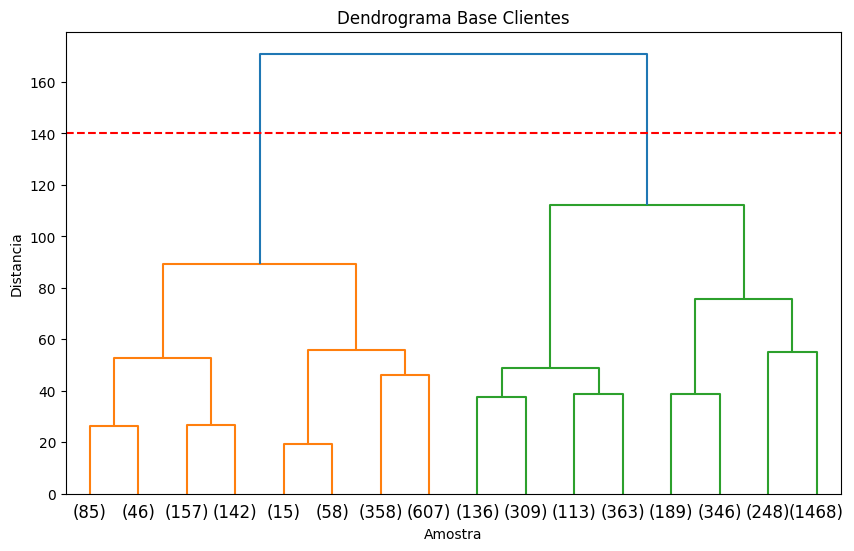

In [14]:
# Calcular a matriz de linkage
linkage_matrix = linkage(scaled_data, method='ward', metric='euclidean')

# Plotar o dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3)
plt.title('Dendrograma Base Clientes')
plt.xlabel('Amostra')
plt.ylabel('Distancia')
plt.axhline(y=140, color='r', linestyle='--')
plt.show()

Devido ao contexto de negocio, uma segmentação dos clientes propensos a compras, escolhemos 2 cluster.

## Realizando a clusterização hierarquica

In [15]:
# Com base no dendrograma, escolher o número de clusters
chosen_num_clusters = 2

# Realizar o clustering hierárquico com o número escolhido de clusters
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linkage_matrix, chosen_num_clusters, criterion='maxclust')

### Adicionando os cluster a coluna de cluster hierarquico no df_clientes

In [16]:
df_clientes['Clusterização_Hierarquica'] = clusters
#conferindo se a coluna está lá
df_clientes.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Clusterização_Hierarquica
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1


# K-Means

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Base Completa

In [22]:
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data_bruto)
    inertia_values.append(kmeans.inertia_)

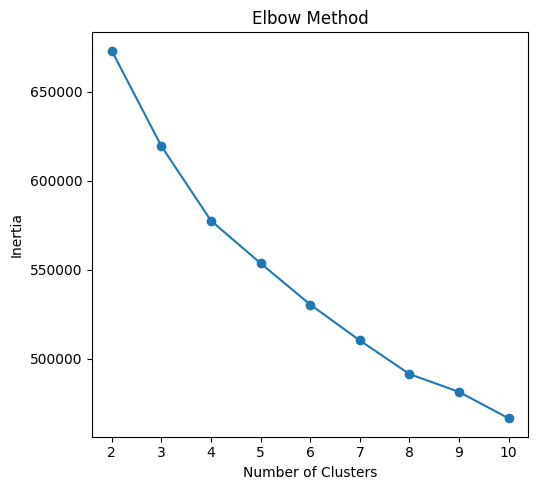

In [23]:
# Plotar o gráfico Elbow para ajudar a escolher o número de clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()

Escolhemos 4 clusters para representar a base inteira

In [24]:
# Escolher o número de clusters com base na análise dos gráficos acima
chosen_num_clusters = 4

# Realizar a clusterização com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data_bruto)

In [25]:
df_bank_bruto['Clusterização_kmeans'] = clusters
#conferindo se a coluna está lá
df_bank_bruto.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Clusterização_kmeans
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2


### Base Clientes

In [26]:
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

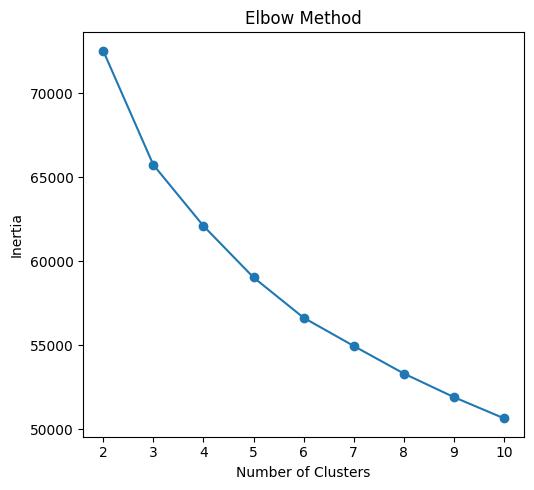

In [27]:
# Plotar o gráfico Elbow para ajudar a escolher o número de clusters
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


plt.tight_layout()
plt.show()

Pelo método do cotovelo, o número de clusters escolhido é 3

In [28]:
# Escolher o número de clusters com base na análise dos gráficos acima
chosen_num_clusters = 3

# Realizar a clusterização com o número escolhido de clusters
kmeans = KMeans(n_clusters=chosen_num_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [29]:
df_clientes['Clusterização_kmeans'] = clusters
#conferindo se a coluna está lá
df_clientes.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Clusterização_Hierarquica,Clusterização_kmeans
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,1575,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1,2
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,1042,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1,2
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,1467,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1,2


# Comparando Resultados

## Base bruta

In [34]:
#Escolhemos como Variaveis para avaliação Idade, Emprego, Estado Civil, Nivel de Educaçao, Meio de Contato e Financiamento Imobiliario
resultado_cluster_hierarquico_bruto= df_bank_bruto.groupby('Clusterização_kmeans').agg(age_mean=('age', 'median'),
                                                                                       job_mode=('job', lambda x: x.mode().iloc[0]),
                                                                                       marital_mode=('marital', lambda x: x.mode().iloc[0]),
                                                                                       education_mode=('education', lambda x: x.mode().iloc[0]),
                                                                                       housing_mode=('housing', lambda x: x.mode().iloc[0]),
                                                                                       contact_mode=('contact', lambda x: x.mode().iloc[0]),
                                                                                       target=('y', lambda x: x.mode().iloc[0]),
                                                                                       volume=('age', 'size'))
print(resultado_cluster_hierarquico_bruto)

                      age_mean job_mode marital_mode     education_mode  \
Clusterização_kmeans                                                      
0                         37.0   admin.      married  university.degree   
1                         38.0   admin.      married  university.degree   
2                         39.0   admin.      married  university.degree   
3                         36.0   admin.      married  university.degree   

                     housing_mode contact_mode target  volume  
Clusterização_kmeans                                           
0                             yes     cellular    yes    1539  
1                             yes     cellular     no   11322  
2                             yes    telephone     no   16311  
3                             yes     cellular     no   12016  


## Base Clientes

### Hierarquico

In [35]:
#Escolhemos como Variaveis para avaliação Idade, Emprego, Estado Civil, Nivel de Educaçao, Meio de Contato e Financiamento Imobiliario
resultado_cluster_hierarquico= df_clientes.groupby('Clusterização_Hierarquica').agg(age_mean=('age', 'median'),
                                                                                    job_mode=('job', lambda x: x.mode().iloc[0]),
                                                                                    marital_mode=('marital', lambda x: x.mode().iloc[0]),
                                                                                    education_mode=('education', lambda x: x.mode().iloc[0]),
                                                                                    housing_mode=('housing', lambda x: x.mode().iloc[0]),
                                                                                    contact_mode=('contact', lambda x: x.mode().iloc[0]),
                                                                                    volume=('age', 'size'))
print(resultado_cluster_hierarquico)

                           age_mean job_mode marital_mode     education_mode  \
Clusterização_Hierarquica                                                      
1                              38.0   admin.      married  university.degree   
2                              36.0   admin.      married  university.degree   

                          housing_mode contact_mode  volume  
Clusterização_Hierarquica                                    
1                                  yes     cellular    1468  
2                                  yes     cellular    3172  


### K-Means

In [36]:
#Escolhemos como Variaveis para avaliação Idade, Emprego, Estado Civil, Nivel de Educaçao, Meio de Contato e Financiamento Imobiliario
resultado_cluster_kmeans = df_clientes.groupby('Clusterização_kmeans').agg(age_mean=('age', 'median'),
                                                                           job_mode=('job', lambda x: x.mode().iloc[0]),
                                                                           marital_mode=('marital', lambda x: x.mode().iloc[0]),
                                                                           education_mode=('education', lambda x: x.mode().iloc[0]),
                                                                           housing_mode=('housing', lambda x: x.mode().iloc[0]),
                                                                           contact_mode=('contact', lambda x: x.mode().iloc[0]),
                                                                           volume=('age', 'size'))
print(resultado_cluster_kmeans)


                      age_mean job_mode marital_mode     education_mode  \
Clusterização_kmeans                                                      
0                         38.0   admin.      married  university.degree   
1                         36.0   admin.      married  university.degree   
2                         38.0   admin.      married  university.degree   

                     housing_mode contact_mode  volume  
Clusterização_kmeans                                    
0                             yes     cellular    1017  
1                             yes     cellular    2284  
2                             yes     cellular    1339  


# Conclusão

Com base nos dados que temos, não foi possível distinguir bem os grupos criados com os algortimos de clusterização. Sabemos apenas que os clientes que aceitaram o produto de investime tem em média 37, são casados, possuem curso superior e financiamento bancario.